IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [2]:
# Load the data
tweets_df=pd.read_csv('twitter.csv')

In [3]:
tweets_df

id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      0  ate @user isz that youuu?ðððððð...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]

In [4]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [5]:
tweets_df.describe()

id         label
count  31962.000000  31962.000000
mean   15981.500000      0.070146
std     9226.778988      0.255397
min        1.000000      0.000000
25%     7991.250000      0.000000
50%    15981.500000      0.000000
75%    23971.750000      0.000000
max    31962.000000      1.000000

In [6]:
tweets_df['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [7]:
# Drop the 'id' column
tweets_df = tweets_df.drop(['id'], axis=1)

In [8]:
tweets_df

label                                              tweet
0          0   @user when a father is dysfunctional and is s...
1          0  @user @user thanks for #lyft credit i can't us...
2          0                                bihday your majesty
3          0  #model   i love u take with u all the time in ...
4          0             factsguide: society now    #motivation
...      ...                                                ...
31957      0  ate @user isz that youuu?ðððððð...
31958      0    to see nina turner on the airwaves trying to...
31959      0  listening to sad songs on a monday morning otw...
31960      1  @user #sikh #temple vandalised in in #calgary,...
31961      0                   thank you @user for you follow  

[31962 rows x 2 columns]

PERFORM DATA EXPLORATION 

<AxesSubplot:>

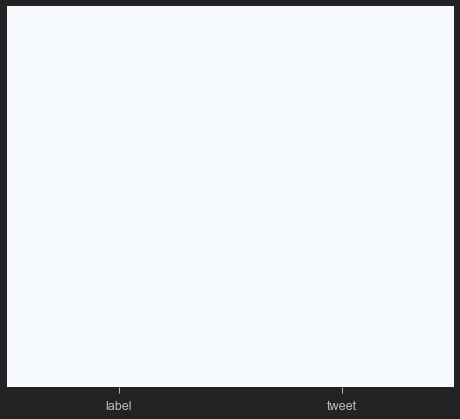

In [9]:
 sns.heatmap(tweets_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

array([[<AxesSubplot:title={'center':'label'}>]], dtype=object)

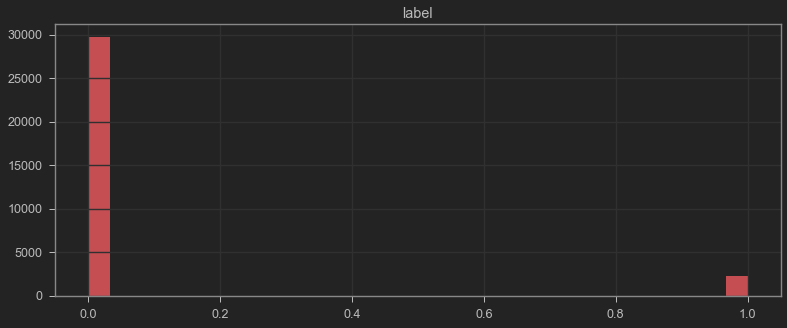

In [10]:
# Plot the histogram
tweets_df.hist(bins = 30, figsize = (13,5), color = 'r')

C:\Users\Evelyn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

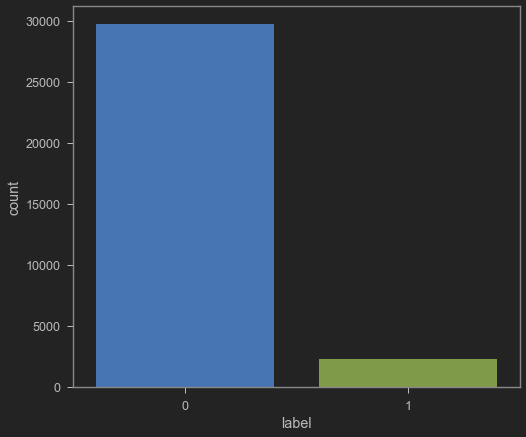

In [11]:
# Plot countplot
sns.countplot(tweets_df['label'], label = 'Count')

In [12]:
# Let's get the length of the messages
tweets_df['length'] = tweets_df['tweet'].apply(len)

In [13]:
tweets_df

label                                              tweet  length
0          0   @user when a father is dysfunctional and is s...     102
1          0  @user @user thanks for #lyft credit i can't us...     122
2          0                                bihday your majesty      21
3          0  #model   i love u take with u all the time in ...      86
4          0             factsguide: society now    #motivation      39
...      ...                                                ...     ...
31957      0  ate @user isz that youuu?ðððððð...      68
31958      0    to see nina turner on the airwaves trying to...     131
31959      0  listening to sad songs on a monday morning otw...      63
31960      1  @user #sikh #temple vandalised in in #calgary,...      67
31961      0                   thank you @user for you follow        32

[31962 rows x 3 columns]

In [14]:
tweets_df.describe()

label        length
count  31962.000000  31962.000000
mean       0.070146     84.739628
std        0.255397     29.455749
min        0.000000     11.000000
25%        0.000000     63.000000
50%        0.000000     88.000000
75%        0.000000    108.000000
max        1.000000    274.000000

In [15]:
# Let's view the shortest message 
tweets_df[tweets_df['length'] == 11]['tweet']

25195    i love you 
Name: tweet, dtype: object

In [16]:
# Let's view the message with mean length 
tweets_df[tweets_df['length']==84]['tweet']


43       my mom shares the same bihday as @user   bihda...
220      g o a l s ð repost from @user #propey #ocea...
640      oscar tabarez talks luis suarezâs angry reac...
723       @user another hands &amp; feet complete!! ber...
742      because great things never came from comfo zon...
                               ...                        
31445    .@user on making choices to keep herself   as ...
31448    i'm a gordo. #passpo #florence #firenze #italy...
31509    just 3 keys that are found on your computer to...
31857    traveling happy #family   holidays #car #sunny...
31883    we spent #familytime by doing simple wefie, we...
Name: tweet, Length: 333, dtype: object

<AxesSubplot:>

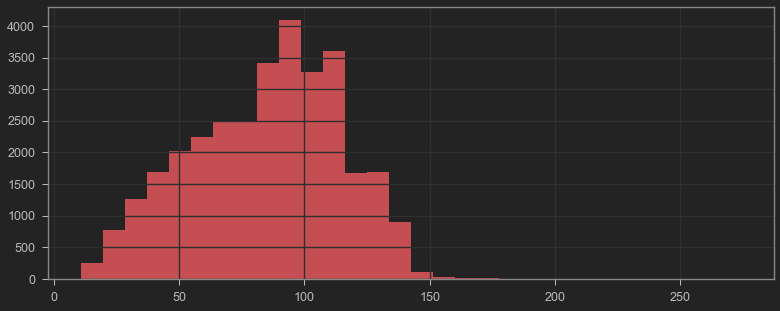

In [17]:
# Plot the histogram of the length column
tweets_df['length'].hist(bins = 30, figsize = (13,5), color = 'r')

PLOT THE WORDCLOUD

In [18]:
positive = tweets_df[tweets_df['label']==0]
positive

label                                              tweet  length
0          0   @user when a father is dysfunctional and is s...     102
1          0  @user @user thanks for #lyft credit i can't us...     122
2          0                                bihday your majesty      21
3          0  #model   i love u take with u all the time in ...      86
4          0             factsguide: society now    #motivation      39
...      ...                                                ...     ...
31956      0  off fishing tomorrow @user carnt wait first ti...      61
31957      0  ate @user isz that youuu?ðððððð...      68
31958      0    to see nina turner on the airwaves trying to...     131
31959      0  listening to sad songs on a monday morning otw...      63
31961      0                   thank you @user for you follow        32

[29720 rows x 3 columns]

In [19]:
negative = tweets_df[tweets_df['label']==1]
negative

label                                              tweet  length
13         1  @user #cnn calls #michigan middle school 'buil...      74
14         1  no comment!  in #australia   #opkillingbay #se...     101
17         1                             retweet if you agree!       22
23         1    @user @user lumpy says i am a . prove it lumpy.      47
34         1  it's unbelievable that in the 21st century we'...     104
...      ...                                                ...     ...
31934      1  lady banned from kentucky mall. @user  #jcpenn...      59
31946      1  @user omfg i'm offended! i'm a  mailbox and i'...      82
31947      1  @user @user you don't have the balls to hashta...     112
31948      1   makes you ask yourself, who am i? then am i a...      87
31960      1  @user #sikh #temple vandalised in in #calgary,...      67

[2242 rows x 3 columns]

In [20]:
sentences = tweets_df['tweet'].tolist()
len(sentences)

31962

In [21]:
sentences_as_one_string =" ".join(sentences)

In [22]:
sentences_as_one_string

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run @user @user thanks for #lyft credit i can\'t use cause they don\'t offer wheelchair vans in pdx.    #disapointed #getthanked   bihday your majesty #model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦    factsguide: society now    #motivation [2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo    @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦ the next school year is the year for exams.ð\x9f\x98¯ can\'t think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦   @user @user welcome here !  i\'m   it\'s so #gr8 !   â\x86\x9d #ireland consumer price index (mom) climbed from pre

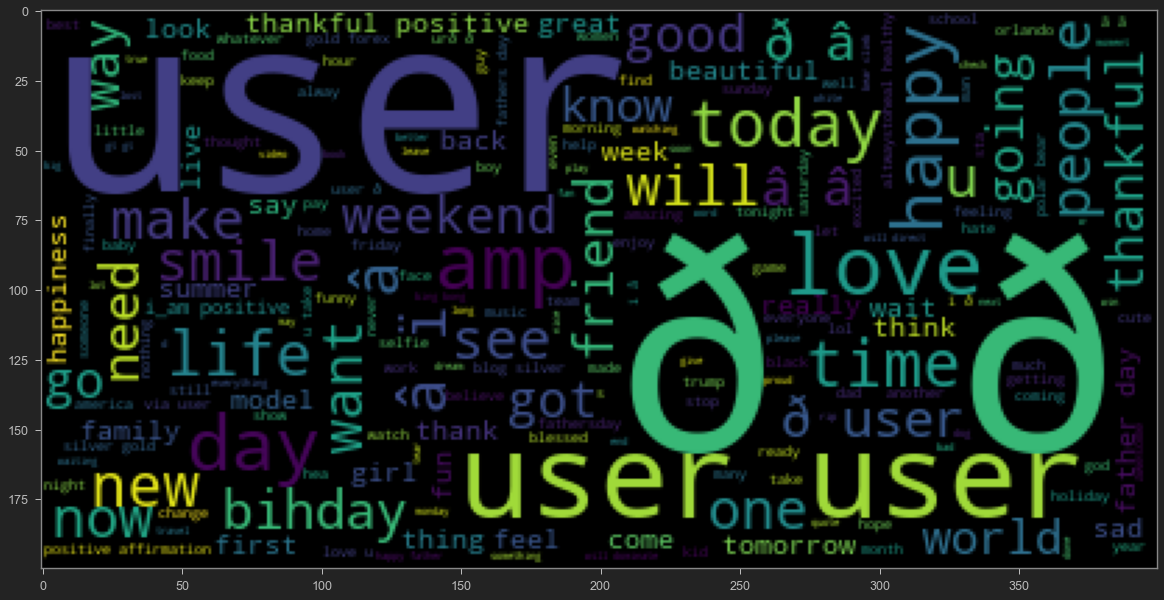

In [23]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [24]:
negetive_string=negative['tweet'].tolist()
negetive_string_in_one_sentence=''.join(negetive_string)
negetive_string_in_one_sentence

'@user #cnn calls #michigan middle school \'build the wall\' chant \'\' #tcot  no comment!  in #australia   #opkillingbay #seashepherd #helpcovedolphins #thecove  #helpcovedolphinsretweet if you agree! @user @user lumpy says i am a . prove it lumpy.it\'s unbelievable that in the 21st century we\'d need something like this. again. #neverump  #xenophobia @user lets fight against  #love #peace ð\x9f\x98©the white establishment can\'t have blk folx running around loving themselves and promoting our greatness  @user hey, white people: you can call people \'white\' by @user  #race  #identity #medâ\x80¦how the #altright uses  &amp; insecurity to lure men into #whitesupremacy    @user i\'m not interested in a #linguistics that doesn\'t address #race &amp; . racism is about #power. #raciolinguistics bringsâ\x80¦@user why not @user mocked obama for being black.  @user @user @user @user #brexit#people aren\'t protesting #trump because a #republican won-they do so because trump has fuhered  &amp;â

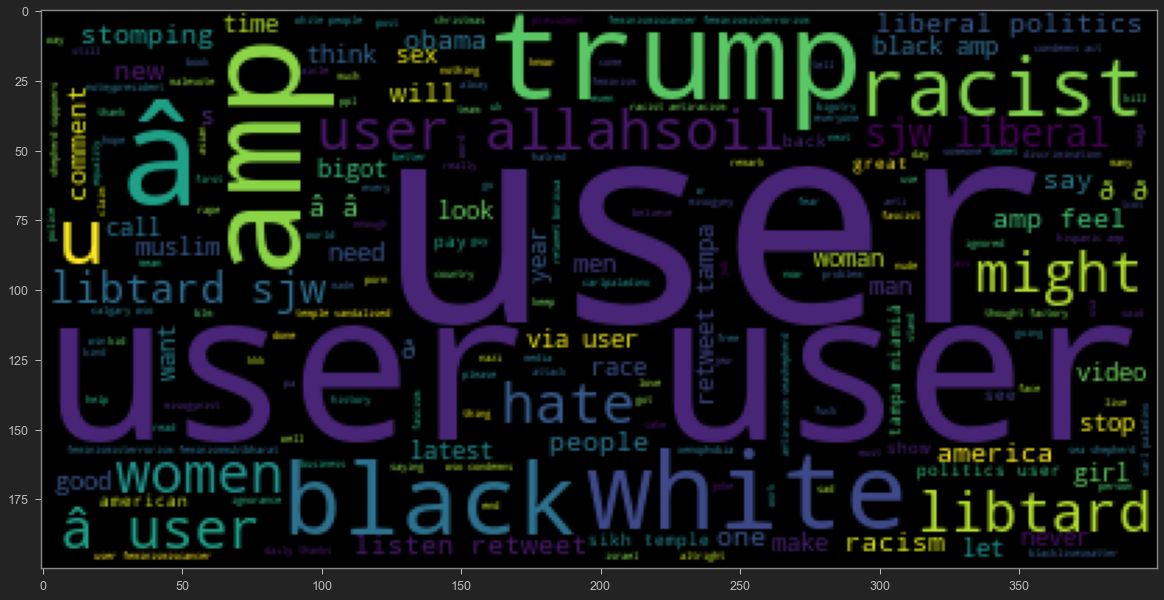

In [25]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negetive_string_in_one_sentence))

PERFORM DATA CLEANING - REMOVE PUNCTUATION FROM TEXT

In [1]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [27]:
Test = '$I love AI & Machine learning!!'
Test_punc_removed = [char for char in Test if char not in string.punctuation]
Test_punc_removed_join=''.join(Test_punc_removed)
Test_punc_removed_join

'I love AI  Machine learning'

In [28]:
Test = 'Good morning beautiful people :)... I am having fun learning Machine learning and AI!!'

In [29]:
Test_punc_removed = [char for char in Test if char not in string.punctuation]
Test_punc_removed

['G',
 'o',
 'o',
 'd',
 ' ',
 'm',
 'o',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'b',
 'e',
 'a',
 'u',
 't',
 'i',
 'f',
 'u',
 'l',
 ' ',
 'p',
 'e',
 'o',
 'p',
 'l',
 'e',
 ' ',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 'h',
 'a',
 'v',
 'i',
 'n',
 'g',
 ' ',
 'f',
 'u',
 'n',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'M',
 'a',
 'c',
 'h',
 'i',
 'n',
 'e',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'A',
 'I']

In [30]:
# Join the characters again to form the string.
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'Good morning beautiful people  I am having fun learning Machine learning and AI'

PERFORM DATA CLEANING - REMOVE STOPWORDS

In [31]:
import nltk # Natural Language tool kit 
nltk.download('stopwords')

# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Evelyn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [32]:
Test_punc_removed_join = 'I enjoy coding, programming and Artificial intelligence'
Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]

In [33]:
Test_punc_removed_join_clean # Only important (no so common) words are left

['enjoy', 'coding,', 'programming', 'Artificial', 'intelligence']

In [34]:
Test_punc_removed_join

'I enjoy coding, programming and Artificial intelligence'

In [35]:
mini_challenge = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations!'

In [36]:
challenge = [char for char in mini_challenge if char not in string.punctuation]
challenge = ''.join(challenge)
challenge

'Here is a mini challenge that will teach you how to remove stopwords and punctuations'

In [37]:
after_cleaning = [word for word in challenge.split() if word.lower() not in stopwords.words('english')]
after_cleaning

['mini', 'challenge', 'teach', 'remove', 'stopwords', 'punctuations']

PERFORM COUNT VECTORIZATION (TOKENIZATION)

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first paper.','This document is the second paper.','And this is the third one.','Is this the first paper?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

In [44]:
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'paper', 'second', 'the', 'third', 'this']


In [45]:
print(X.toarray())  

[[0 0 1 1 0 1 0 1 0 1]
 [0 1 0 1 0 1 1 1 0 1]
 [1 0 0 1 1 0 0 1 1 1]
 [0 0 1 1 0 1 0 1 0 1]]


In [46]:
mini_challenge = ['Hello World','Hello Hello World','Hello World world world']
#[1 1][2 1][1 3]
# mini_challenge = ['Hello World', 'Hello Hello Hello World world', 'Hello Hello World world world World']
vectorizer_challenge = CountVectorizer()
X_challenge = vectorizer_challenge.fit_transform(mini_challenge)
print(vectorizer_challenge.get_feature_names())
print(X_challenge.toarray())  


['hello', 'world']
[[1 1]
 [2 1]
 [1 3]]


CREATE A PIPELINE TO REMOVE PUNCTUATIONS, STOPWORDS AND PERFORM COUNT VECTORIZATION

In [47]:
# Let's define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [48]:
# Let's test the newly added function
tweets_df_clean = tweets_df['tweet'].apply(message_cleaning)

In [49]:
print(tweets_df_clean[5]) # show the cleaned up version

['22', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo']


In [50]:
print(tweets_df['tweet'][5]) # show the original version

[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  


In [51]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning, dtype = np.uint8)
tweets_countvectorizer = vectorizer.fit_transform(tweets_df['tweet'])

In [52]:
print(vectorizer.get_feature_names())


['0', '0000001', '00027', '001', '0035', '00h30', '01', '0115', '0161', '019', '01926889917', '02', '0265', '0266808099', '02900', '03', '030916', '03111880779', '032', '033', '0345', '039', '04', '045', '04k', '05', '0506823156', '06', '06052016', '0606', '060616', '0608', '0608wed', '0609', '0610', '061116', '0612', '0613', '0616', '0617', '0618', '0618saturday7monthscouple', '0618â\x99¡', '0620', '06202016', '0622', '0624', '06Â', '07', '07000', '07040', '07044', '07150', '07190', '07400', '07468', '07500', '076', '07788427999', '07800', '07840', '07850', '07870', '07900', '07930', '07950', '08', '0806', '080616', '088b', '08â\x80¦', '09', '09062016', '0933m', '09600', '0k', '0shares', '0tolerancemovie', '0ð\x9f\x98¥â\x98¹ï¸\x8f', '1', '10', '100', '1000', '100000', '10003', '10007', '1000gifts', '1000th', '1000x', '1000yr', '1000â\x82¬', '1001', '1001000s', '10014', '10021', '10025', '10040', '100616', '10064', '100d', '100daysofcode', '100daysofpigpaintings', '100daysoftea', '100f

In [53]:
print(tweets_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [54]:
tweets_countvectorizer.shape

(31962, 47386)

In [55]:
X = pd.DataFrame(tweets_countvectorizer.toarray())


In [56]:
X

0      1      2      3      4      5      6      7      8      9      \
0          0      0      0      0      0      0      0      0      0      0   
1          0      0      0      0      0      0      0      0      0      0   
2          0      0      0      0      0      0      0      0      0      0   
3          0      0      0      0      0      0      0      0      0      0   
4          0      0      0      0      0      0      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
31957      0      0      0      0      0      0      0      0      0      0   
31958      0      0      0      0      0      0      0      0      0      0   
31959      0      0      0      0      0      0      0      0      0      0   
31960      0      0      0      0      0      0      0      0      0      0   
31961      0      0      0      0      0      0      0      0      0      0   

       ...  47376  47377  47378  47379  47380  47381  47382  47383  47384  \
0      ...      0      0      0      0      0      0      0      0      0   
1      ...      0      0      0      0      0      0      0      0      0   
2      ...      0      0      0      0      0      0      0      0      0   
3      ...      0      0      0      0      0      0      0      0      0   
4      ...      0      0      0      0      0      0      0      0      0   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
31957  ...      0      0      0      0      0      0      0      0      0   
31958  ...      0      0      0      0      0      0      0      0      0   
31959  ...      0      0      0      0      0      0      0      0      0   
31960  ...      0      0      0      0      0      0      0      0      0   
31961  ...      0      0      0      0      0      0      0      0      0   

       47385  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
31957      0  
31958      0  
31959      0  
31960      0  
31961      0  

[31962 rows x 47386 columns]

In [57]:
y = tweets_df['label']

TRAIN AND EVALUATE A NAIVE BAYES CLASSIFIER MODEL

In [58]:
X.shape

(31962, 47386)

In [59]:
y.shape

(31962,)

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [66]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [67]:
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot:>

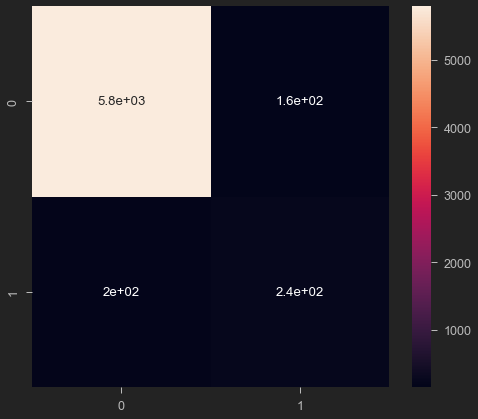

In [68]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [69]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5952
           1       0.60      0.55      0.58       441

    accuracy                           0.94      6393
   macro avg       0.79      0.76      0.77      6393
weighted avg       0.94      0.94      0.94      6393

